In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as sts
%matplotlib inline
import statistics
import math



Загрузить датасет по url:


In [40]:
# следующая строчка подключает сертификат для защищенного соединения
# ssl._create_default_https_context = ssl._create_unverified_context - у меня почему то не работает эта строчка
# все данные загружаются с сервера
url="http://yustiks.ru/dataset/world-happiness-report-2019.csv"
df=pd.read_csv(url)



Более подробно о датасете можно прочитать по данной ссылке или по ссылке в kaggle

Context

The World Happiness Report is a landmark survey of the state of global happiness that ranks 156 countries by how happy their citizens perceive themselves to be. This year’s World Happiness Report focuses on happiness and the community: how happiness has evolved over the past dozen years, with a focus on the technologies, social norms, conflicts and government policies that have driven those changes.

    Country (region) Name of the country.
    Ladder Cantril Ladder is a measure of life satisfaction.
    SD of Ladder Standard deviation of the ladder.
    Positive affect Measure of positive emotion.
    Negative affect Measure of negative emotion.
    Social support The extent to which Social support contributed to the calculation of the Happiness Score.
    Freedom The extent to which Freedom contributed to the calculation of the Happiness Score.
    Corruption The extent to which Perception of Corruption contributes to Happiness Score.
    Generosity The extent to which Generosity contributed to the calculation of the Happiness Score.
    Log of GDP per capita The extent to which GDP contributes to the calculation of the Happiness Score.
    Healthy life expectancy The extent to which Life expectancy contributed to the calculation of the Happiness Score.

Посмотреть первые несколько рядов таблицы


In [41]:
df.head()

,Country (region),Ladder,SD of Ladder,Positive affect,Negative affect,Social support,Freedom,Corruption,Generosity,Log of GDP\nper capita,Healthy life\nexpectancy
0,Finland,1,4,41.0,10.0,2.0,5.0,4.0,47.0,22.0,27.0
1,Denmark,2,13,24.0,26.0,4.0,6.0,3.0,22.0,14.0,23.0
2,Norway,3,8,16.0,29.0,3.0,3.0,8.0,11.0,7.0,12.0
3,Iceland,4,9,3.0,3.0,1.0,7.0,45.0,3.0,15.0,13.0
4,Netherlands,5,1,12.0,25.0,15.0,19.0,12.0,7.0,12.0,18.0


Построить частотный график для двух параметров: Freedom и positive affect. Какое это распределение?

In [42]:
df.isnull().sum()

Country (region)            0
Ladder                      0
SD of Ladder                0
Positive affect             1
Negative affect             1
Social support              1
Freedom                     1
Corruption                  8
Generosity                  1
Log of GDP\nper capita      4
Healthy life\nexpectancy    6
dtype: int64

In [43]:
# у нас в датасете есть данные, которые выходят по нулям. Думаю лучше будет удалить все значения Nan

df=df.dropna()

df.head()

,Country (region),Ladder,SD of Ladder,Positive affect,Negative affect,Social support,Freedom,Corruption,Generosity,Log of GDP\nper capita,Healthy life\nexpectancy
0,Finland,1,4,41.0,10.0,2.0,5.0,4.0,47.0,22.0,27.0
1,Denmark,2,13,24.0,26.0,4.0,6.0,3.0,22.0,14.0,23.0
2,Norway,3,8,16.0,29.0,3.0,3.0,8.0,11.0,7.0,12.0
3,Iceland,4,9,3.0,3.0,1.0,7.0,45.0,3.0,15.0,13.0
4,Netherlands,5,1,12.0,25.0,15.0,19.0,12.0,7.0,12.0,18.0


In [44]:
df.isnull().sum()

Country (region)            0
Ladder                      0
SD of Ladder                0
Positive affect             0
Negative affect             0
Social support              0
Freedom                     0
Corruption                  0
Generosity                  0
Log of GDP\nper capita      0
Healthy life\nexpectancy    0
dtype: int64

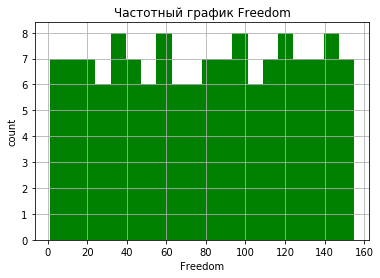

In [45]:
n = plt.hist(df['Freedom'], 20, facecolor='g')

plt.xlabel('Freedom')
plt.ylabel('count')
plt.title('Частотный график Freedom')
plt.grid(True)
plt.show()

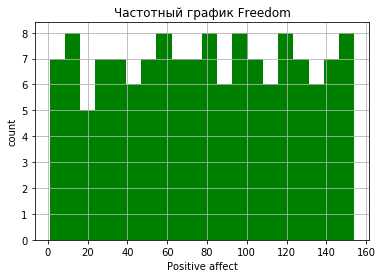

In [46]:
n = plt.hist(df['Positive affect'], 20, facecolor='g')

plt.xlabel('Positive affect')
plt.ylabel('count')
plt.title('Частотный график Freedom')
plt.grid(True)
plt.show()

Найти медиану, моду, математическое ожидание, стандартное отклонение, дисперсию, минимум и максимум, найти выбросы (если есть), размах для колонки Freedom

In [48]:
freedom=df['Freedom']
counts=len(freedom)
expected_value=0
duration_count={}

for i in freedom:
    if i not in duration_count:
        duration_count[i]=1
    else:
        duration_count[i]+=1

for j in duration_count.keys():
    count=duration_count[j]
    expected_value+=(count/counts)*j

print('Математическое ожидание: ', expected_value)



standard_deviation=0
sum_=0

for i in freedom:
    sum_+=(i-expected_value)**2

standard_deviation=math.sqrt(sum_/(counts))

print('Стандартное отклонение: {:.2f}'.format(standard_deviation))


dispersion=standard_deviation**2

print('Дисперсия: {:.2f}'.format(dispersion))


i_max = 1
mode=0

for i in duration_count.keys():
    if i_max<duration_count[i]:
        mode=i
        i_max=duration_count[i]
    else:
        mode='Нет значений'
print('Мода: ', mode)

freedom_max=max(freedom)
freedom_min=min(freedom)

print('Максимальное значение:',freedom_max)
print('Минимальное значение:', freedom_min)


scope=freedom_max-freedom_min

print('Размах:', scope)

Математическое ожидание:  78.82857142857148
Стандартное отклонение: 44.95
Дисперсия: 2020.28
Мода:  Нет значений
Максимальное значение: 155.0
Минимальное значение: 1.0
Размах: 154.0


In [49]:
print('Математическое ожидание: ',statistics.mean(df['Freedom']))

print('Медиана: ', statistics.median(df['Freedom']))

print('Мода: ', statistics.mode(df['Freedom']))

Математическое ожидание:  78.82857142857142
Медиана:  79.5


StatisticsError: no unique mode; found 140 equally common values



Почему нельзя найти моду?


Я удалил все значения Nan и количество всех значений будет одинаковым

Посмотреть корреляцию между Freedom и positive affect (графически и математически). Графически - plt.scatter, математически - посчитать коэффициент Пирсона. О чем говорит знак коэффициента?

Коэффициент корреляции Пирсона: 0.6965670458090685


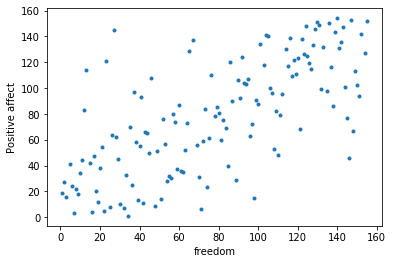

In [50]:
from scipy.stats import pearsonr

x=df['Freedom']
y=df['Positive affect']

corr, p_value = pearsonr(x, y)

plt.xlabel('freedom')
plt.ylabel('Positive affect')

plt.scatter(x, y, marker='.')


print('Коэффициент корреляции Пирсона:', corr)



Нормализовать данные колонки Freedom (централизация + масштабирование)


In [51]:
duration = df['Freedom']

duration_1 = duration - statistics.mean(duration)

print(statistics.mean(duration_1))

6.496390726949487e-15


In [52]:
min(duration_1)

-77.82857142857142

In [53]:
max(duration_1)

76.17142857142858

In [55]:
from sklearn import preprocessing

min_max_scaler = preprocessing.MinMaxScaler(feature_range=(-1,1))

duration_2 = min_max_scaler.fit_transform(np.array(duration_1).reshape(-1, 1))

print(min(duration_2))
print(max(duration_2))

[-1.]
[1.]




Построить матрицу корреляций для всех колонок таблицы


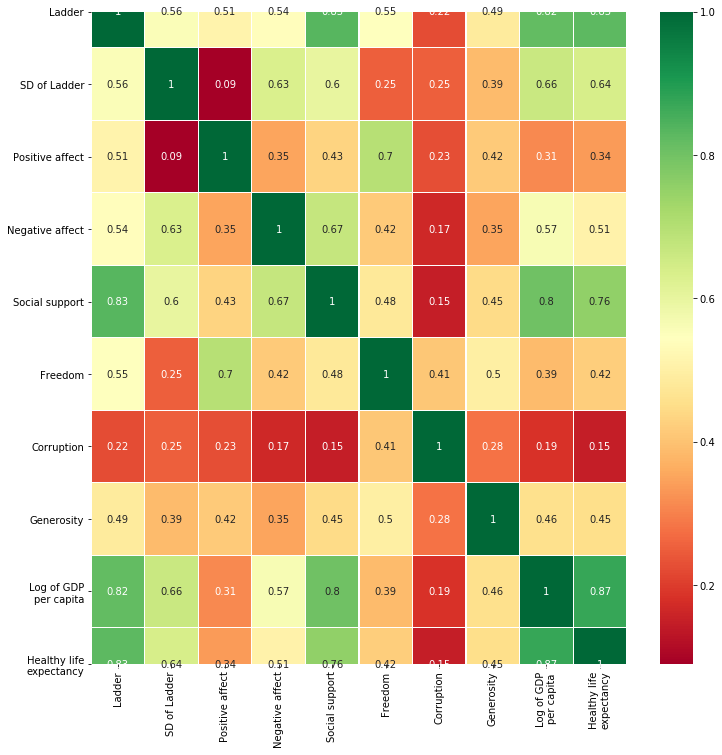

In [56]:
import seaborn as sb

sb.heatmap(df.corr(),annot=True,cmap='RdYlGn',linewidths=0.2) #data.corr()-->correlation matrix

fig=plt.gcf()
fig.set_size_inches(12,12)

plt.show()



Загрузить таблицу цен на авокадо:


In [59]:


#df=pd.read_csv('data/avocado.csv')
#df[:3]

import io
import requests
url="http://yustiks.ru/avocado.csv"
df=pd.read_csv(url)
df[:5]

HTTPError: HTTP Error 404: Not Found



Сделать частотный график колонки AveragePrice. Какое это распределение?



Найти корреляцию в следующих колонках:

колонкой 4046, 4225, 4770 и Average Price. Если корелляция есть (обратная или прямая), то какие выводы можно сделать?
